# Flight Price Prediction

## Data Description
To predict the price of flight using the provided dataset

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
dg=pd.read_excel(r"C:\Users\jothu\Documents\Data_Train.xlsx")

In [3]:
dg.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


This is our Train data

In [4]:
ds=pd.read_excel(r"C:\Users\jothu\Documents\Test_set.xlsx")

In [5]:
ds.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This is the test data it does not have target variable

In [6]:
dk=pd.read_excel(r"C:\Users\jothu\Documents\Sample_submission.xlsx")

In [7]:
dk.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


This is the target value for test data

## Exploratory Data Analysis

In [8]:
dg.shape

(10683, 11)

This is the shape of data

In [9]:
dg.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

These are the datatypes of each columns which includes int and object values 

In [10]:
ds.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the data in test set is object

In [11]:
dg.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

These are the columns of data

In [12]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [14]:
dg.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Total_Stops and Route has null values

In [15]:
ds.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values in test data set

In [16]:
dg.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


Most of the data is NaN because all the values are in object format

In [17]:
dg.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [18]:
dg.Price.unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

Target variable is continuous

In [19]:
dg.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

##  Extracting  month column from Date

In [20]:
dg["Date_of_Journey"]=pd.to_datetime(dg["Date_of_Journey"])
dg["Date_of_Journey"]

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [21]:
dg["Date_of_Journey"]=dg["Date_of_Journey"].dt.month

In [22]:
dg["Date_of_Journey"]

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Date_of_Journey, Length: 10683, dtype: int64

In [23]:
ds["Date_of_Journey"]=pd.to_datetime(ds["Date_of_Journey"])
ds["Date_of_Journey"]

0      2019-06-06
1      2019-12-05
2      2019-05-21
3      2019-05-21
4      2019-06-24
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 2671, dtype: datetime64[ns]

In [24]:
ds["Date_of_Journey"]=ds["Date_of_Journey"].dt.month

In [25]:
ds["Date_of_Journey"]

0        6
1       12
2        5
3        5
4        6
        ..
2666     6
2667     3
2668     6
2669     6
2670     6
Name: Date_of_Journey, Length: 2671, dtype: int64

## Using LabelEncoder for data type conversion and replacing NaN values

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for val in list1:
    dg[val]=le.fit_transform(dg[val].astype(str))
    
    dg=dg.replace(np.nan,dg.mean())

In [34]:
dg.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,0,9,3,0,90,183,1259,236,5,8,4107
10679,1,4,3,0,90,193,1305,237,5,8,4145
10680,6,4,0,2,39,58,824,280,5,8,7229
10681,2,1,0,5,39,92,938,238,5,8,12648
10682,1,9,2,1,11,85,1124,347,1,8,11753


All the data converted to same format in train set

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))
    
    ds=ds.replace(np.nan,ds.mean())

In [36]:
ds.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,1,6,3,0,51,170,617,150,0,5
2667,3,3,3,0,43,106,507,213,4,5
2668,4,6,2,1,76,183,151,278,0,5
2669,1,6,2,1,76,11,577,60,0,5
2670,6,6,2,1,76,15,577,49,0,5


All the data converted into same format and replaced nan values in test set 

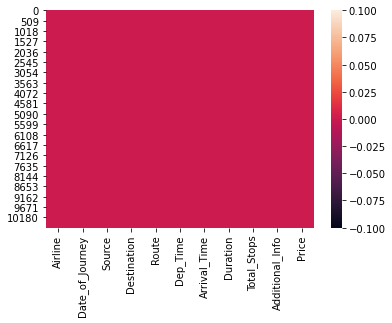

In [38]:
sns.heatmap(dg.isnull())

There are no missing data or null values 

In [39]:
dgcor=dg.corr()
dgcor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,-0.008449,0.027838,-0.011180,-0.112244,-0.051198,-0.090213,0.043183,-0.037116,-0.206187,0.015266
Date_of_Journey,-0.008449,1.000000,0.063052,-0.105039,0.042406,0.027747,-0.002303,-0.038864,-0.057892,-0.009098,0.010700
Source,0.027838,0.063052,1.000000,-0.592574,0.388369,0.055191,0.020844,-0.192009,-0.227074,-0.022107,0.015998
Destination,-0.011180,-0.105039,-0.592574,1.000000,-0.182292,-0.063608,-0.036830,0.022037,0.340446,0.026806,-0.071112
Route,-0.112244,0.042406,0.388369,-0.182292,1.000000,0.188347,0.034843,-0.029824,0.092310,-0.021319,-0.020791
Dep_Time,-0.051198,0.027747,0.055191,-0.063608,0.188347,1.000000,-0.023294,0.041619,0.046574,-0.052853,0.002949
Arrival_Time,-0.090213,-0.002303,0.020844,-0.036830,0.034843,-0.023294,1.000000,0.027746,-0.095612,0.017505,0.027377
Duration,0.043183,-0.038864,-0.192009,0.022037,-0.029824,0.041619,0.027746,1.000000,0.177752,0.080151,-0.144270
Total_Stops,-0.037116,-0.057892,-0.227074,0.340446,0.092310,0.046574,-0.095612,0.177752,1.000000,0.161728,-0.581863
Additional_Info,-0.206187,-0.009098,-0.022107,0.026806,-0.021319,-0.052853,0.017505,0.080151,0.161728,1.000000,-0.065478


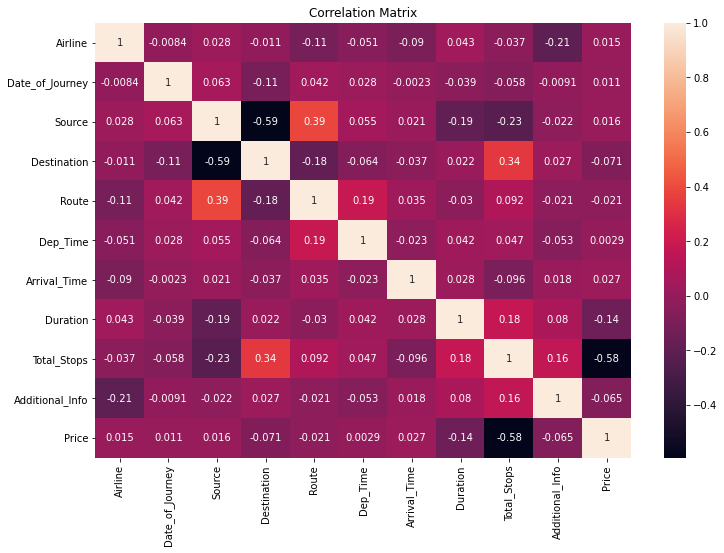

In [41]:
plt.figure(figsize=[12,8])
sns.heatmap(dgcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

Price is negatively correlated with Total_Stops,Destination,route,Additional_Info.

Source and rooute is positively correlated to each other.

Price is positively correlated with Airline.

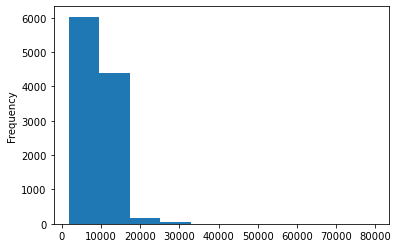

In [110]:
dg['Price'].plot.hist()

0 to 10000 has the highest frequency

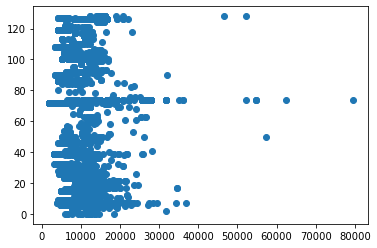

In [113]:
plt.scatter(dg['Price'],dg['Route'])
plt.show()

This shows the relation between Price and Route

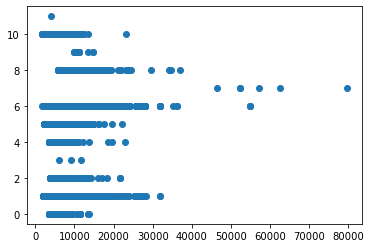

In [115]:
plt.scatter(dg['Price'],dg['Airline'])
plt.show()

This shows the relation between Price and Airline.

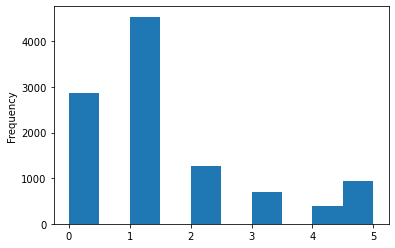

In [117]:
dg['Destination'].plot.hist()

Frequency is high in 1

## Checking Outliers using boxplot

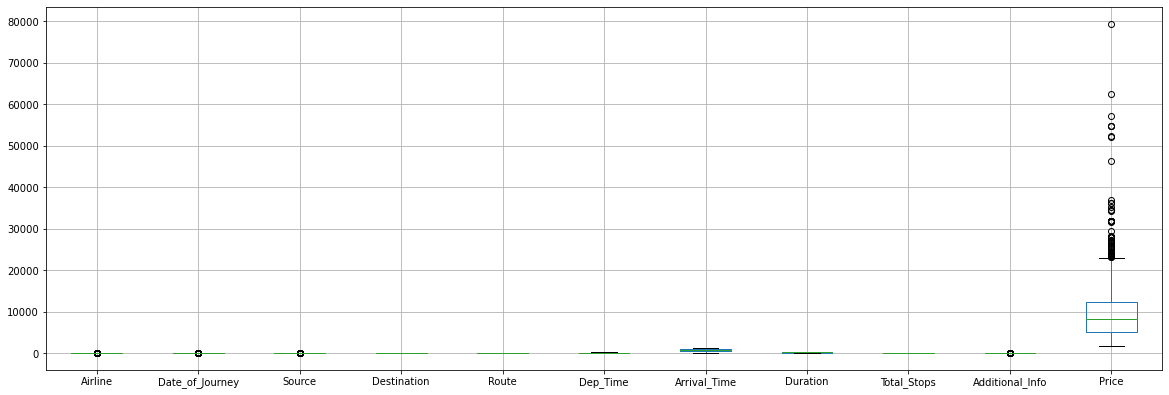

In [42]:
dg.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are few ouliers in Price,Additional_Info in train set

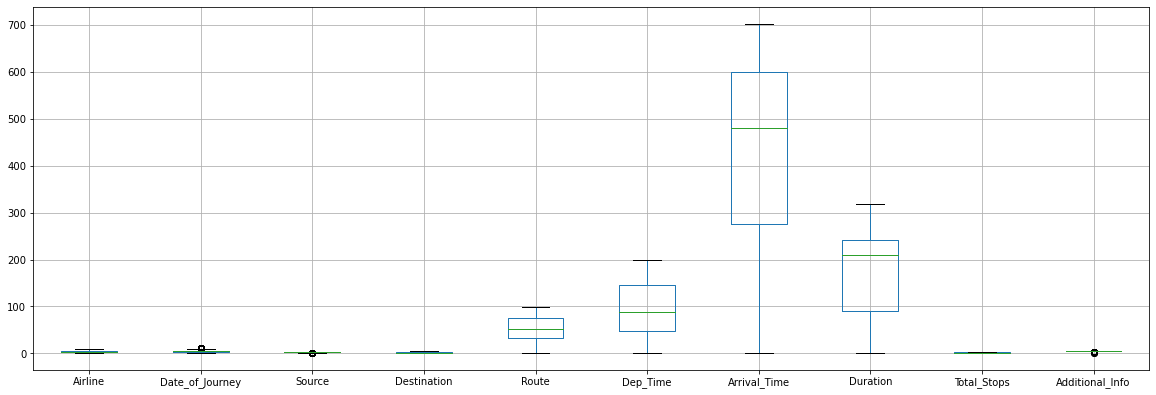

In [43]:
ds.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are few outliers in Date_of_Journey,Source,Additional_Info in test set

## Removing Outliers

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(dg))
z

array([[0.04772381, 0.84850298, 1.65844074, ..., 1.41743199, 0.49989167,
        1.12554821],
       [1.55054913, 1.5179928 , 0.89005213, ..., 0.34623757, 0.49989167,
        0.30904789],
       [0.32798252, 1.15996647, 0.04055451, ..., 0.34623757, 0.49989167,
        1.03985835],
       ...,
       [0.32798252, 0.51375808, 1.65844074, ..., 1.41743199, 0.49989167,
        0.40295085],
       [1.1748428 , 1.5179928 , 1.65844074, ..., 1.41743199, 0.49989167,
        0.77224576],
       [1.55054913, 1.15996647, 0.04055451, ..., 0.34623757, 0.49989167,
        0.57815073]])

In [45]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([10, 10, 10, 10, 10, 10, 10,  9, 

In [47]:
z[123][10]

3.9779582952974644

In [46]:
z[10511][10]

3.7719356386534137

In [48]:
dg_new=dg[(z<3).all(axis=1)]

In [49]:
 dg.shape

(10683, 11)

In [50]:
dg_new.shape

(10578, 11)

In [51]:
loss_percent=(10683-10578)/10683*100
print(loss_percent)

0.9828699803426004


Only 0.9 is the data lost after removing outlier

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[0.01190758, 0.12908857, 0.03256662, ..., 1.69830361, 0.792411  ,
        0.48039397],
       [0.42377921, 2.10122721, 0.87708559, ..., 0.83658895, 0.792411  ,
        0.48039397],
       [0.01190758, 0.1996012 , 0.03256662, ..., 0.22849195, 0.792411  ,
        2.14897547],
       ...,
       [0.01190758, 0.12908857, 0.03256662, ..., 1.15611322, 0.792411  ,
        0.48039397],
       [1.29515278, 0.12908857, 0.03256662, ..., 1.16576315, 0.792411  ,
        0.48039397],
       [0.88328115, 0.12908857, 0.03256662, ..., 1.28292205, 0.792411  ,
        0.48039397]])

In [53]:
threshold=3
print(np.where(z>3))

(array([ 954, 1802, 1861], dtype=int64), array([9, 9, 9], dtype=int64))


In [54]:
z[954][9]

6.093029613616474

In [55]:
ds_new=ds[(z<3).all(axis=1)]

In [56]:
ds.shape

(2671, 10)

In [57]:
ds_new.shape

(2668, 10)

In [58]:
loss_percent=(2671-2668)/2671*100
print(loss_percent)

0.11231748408835641


only 0.1 data is lost after removing outliers

## Checking skewness

In [77]:
x=dg_new.iloc[:,0:10]

In [78]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,5,3,0,5,39,211,233,240,5,8
1,1,1,3,0,112,31,906,336,1,8
2,6,9,2,1,22,70,413,106,1,8
3,5,12,3,0,120,164,1324,311,0,8
4,5,1,0,5,51,149,1237,303,0,8
...,...,...,...,...,...,...,...,...,...,...
10678,0,9,3,0,90,183,1259,236,5,8
10679,1,4,3,0,90,193,1305,237,5,8
10680,6,4,0,2,39,58,824,280,5,8
10681,2,1,0,5,39,92,938,238,5,8


In [67]:
x.skew()

Airline           -0.265598
Date_of_Journey    0.636141
Source            -0.439204
Destination        1.269454
Route              0.387338
Dep_Time           0.194141
Arrival_Time      -0.608273
Duration          -0.216095
Total_Stops        0.654339
Additional_Info   -1.533587
dtype: float64

There is very less skewness in few columns

In [118]:
x.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
10678,0,9,3,0,90,183,1259,236,5,8
10679,1,4,3,0,90,193,1305,237,5,8
10680,6,4,0,2,39,58,824,280,5,8
10681,2,1,0,5,39,92,938,238,5,8
10682,1,9,2,1,11,85,1124,347,1,8


In [79]:
y=dg_new["Price"]

In [80]:
y.tail()

10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, dtype: int64

## Finding the best Random_State

In [81]:
from sklearn.linear_model import LinearRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predrf=lm.predict(x_test)
    acc=lm.score(x_train,y_train)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.43803570379565315  on Random_state 93


## Creating train-test split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=93)

In [83]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [91]:
    Dt=DecisionTreeRegressor()
    Dt.fit(x_train,y_train)
    Dt.predict(x_test)
    Dt.score(x_train,y_train)

0.9670514558194895

In [92]:
    RF=RandomForestRegressor()
    RF.fit(x_train,y_train)
    RF.predict(x_test)
    RF.score(x_train,y_train)

0.9552113100815828

In [84]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Mean squared error',mean_squared_error(y_test,predm))
    print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
    print('Mean absolute error',mean_absolute_error(y_test,predm))
    print('Print R2 score',r2_score(y_test,predm)) 
    print('\n')

Mean squared error 9985176.782341816
Square root of Mean squared error 3159.933034471113
Mean absolute error 2495.145651279222
Print R2 score 0.38768986641428815


Mean squared error 3661520.6831120756
Square root of Mean squared error 1913.5100425950409
Mean absolute error 1005.9206401716326
Print R2 score 0.775468550284656


Mean squared error 2619353.2732525677
Square root of Mean squared error 1618.4416187346912
Mean absolute error 916.9818265871967
Print R2 score 0.8393762486519242




## Cross validation

In [85]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.4216155589471081


In [88]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.7937127657292993


In [89]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.8488203718284826


Cross validation scores can be observed

Linear regression works the best since it has score as 43 and cross val score as 42 

## Hyper parameter Tunning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [95]:
parameters= {'n_jobs':np.arange(2,15),
            'copy_X':['intercept_','coef_']}

In [96]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [97]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['intercept_', 'coef_'],
                         'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [98]:
GCV.best_params_

{'copy_X': 'intercept_', 'n_jobs': 2}

In [99]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [102]:
r2_score(y_test,GCV_pred)

0.38768986641428815

## Saving the best Model

In [103]:
import joblib
joblib.dump(GCV.best_estimator_,"Flight Price Prediction.pkl")

['Flight Price Prediction.pkl']

In [104]:
mod=joblib.load('Temperature Prediction.pkl')